Found 3820 files belonging to 4 classes.
Found 3820 files belonging to 4 classes.
Using 764 files for validation.


C:\Users\saikarthik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.5197 - loss: 1.7477 - val_accuracy: 0.8455 - val_loss: 0.4150
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 95s 785ms/step - accuracy: 0.8365 - loss: 0.4140 - val_accuracy: 0.8861 - val_loss: 0.3035
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 111s 925ms/step - accuracy: 0.8702 - loss: 0.3471 - val_accuracy: 0.9306 - val_loss: 0.1845
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 85s 700ms/step - accuracy: 0.9147 - loss: 0.2286 - val_accuracy: 0.9306 - val_loss: 0.1960
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 61s 505ms/step - accuracy: 0.9276 - loss: 0.1914 - val_accuracy: 0.9581 - val_loss: 0.1374
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 113s 756ms/step - accuracy: 0.9474 - loss: 0.1479 - val_accuracy: 0.9620 - val_loss: 0.0959
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 155s 860ms/step - accuracy: 0.9579 - loss: 0.1209 - val_accuracy: 0.9948 - val_loss: 0.0367
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 78s 644ms/step - accuracy: 0.9812 - loss: 

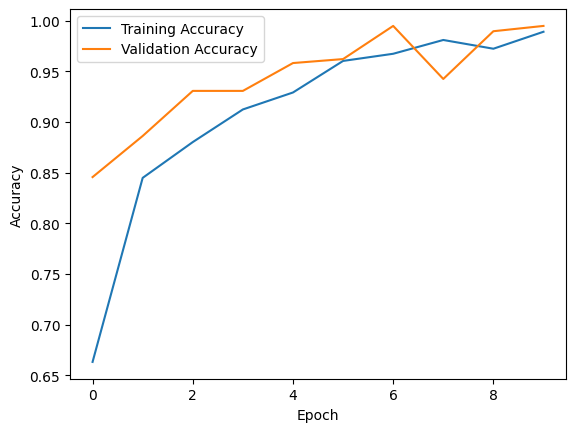

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

train_dataset = tf.keras.utils.image_dataset_from_directory(
    'Blood cell Cancer [ALL]/',
    image_size=(128, 128),  # Resize images to a uniform size
    batch_size=32,
    label_mode='int'       # Labels will be integers
)

# Access the class names directly from the raw dataset
class_names = train_dataset.class_names  # This will give you the list of class names

# Split the data into training and validation
val_dataset = tf.keras.utils.image_dataset_from_directory(
    'Blood cell Cancer [ALL]/',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32,
    label_mode='int'
)

# Normalize pixel values to [0,1]
normalization_layer = layers.Rescaling(1.0 / 255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Create the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Use class_names directly
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [2]:
model.save('blood_model.h5')


In [3]:
model.save('blood_model.keras')
